<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


<font color='Orange'><h3>Data Exploration - Task 1</h3> </font>

In [5]:
# remove unnamed column to keep df clean
boston_df=boston_df.iloc[:,1:]

# display data 
print('Boston data shape is ',boston_df.shape)
boston_df.head(3)

Boston data shape is  (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7


In [6]:
# check info of df to see if there are any nulls , datatype of columns
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
# get statistical summary of each column
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<font color='Orange'><h3>Visualization - Task 2</h3></font>

- Box plot of Median Value of owner occupied homes shows that the median value is around 22
- Q3=25 ,Q1=17, interquartile range is 8
- We can also see quite the number of outliers in the higher range

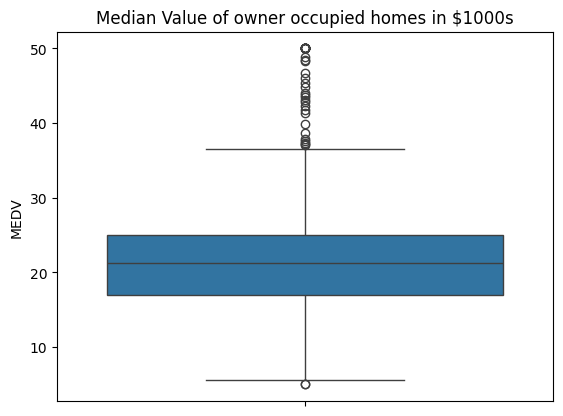

In [8]:
sns.boxplot(y=boston_df.MEDV
           )
pyplot.title('Median Value of owner occupied homes in $1000s');

- We can see from the bar plots below that 35 (6.9%) houses are bound by the Charles river tract and 471 are not.
- The average MEDV price of houses bound by the River is 28, whereas those that are not bound by river is 22.
- Thus if houses are bound by the Charles river they appear to have higher pricing than those that are not.

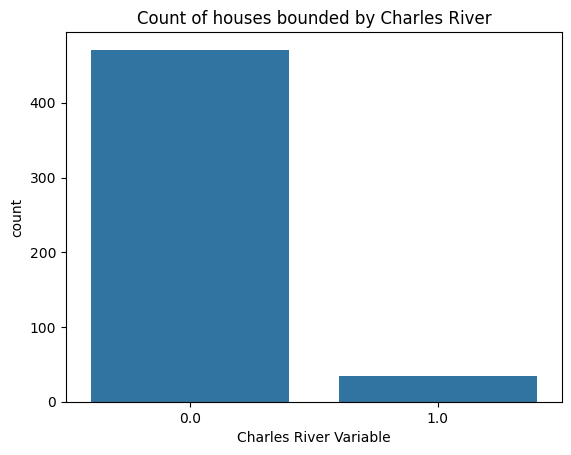

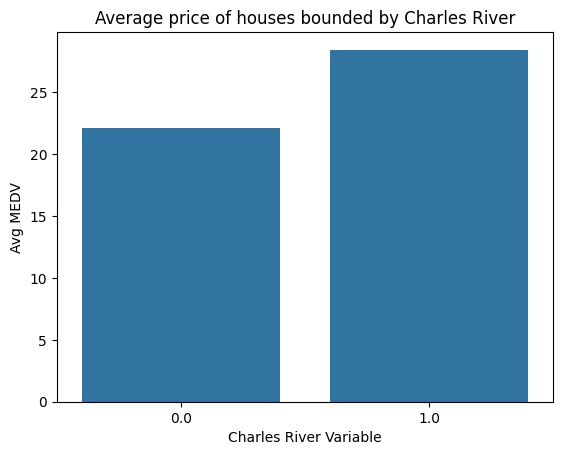

In [9]:
sns.countplot(data=boston_df,x='CHAS')
pyplot.xlabel('Charles River Variable')
pyplot.title('Count of houses bounded by Charles River');
pyplot.show()

bar_df=boston_df.groupby('CHAS')['MEDV'].mean().reset_index()
sns.barplot(data=bar_df,x='CHAS',y='MEDV')
pyplot.title('Average price of houses bounded by Charles River')
pyplot.xlabel('Charles River Variable')
pyplot.ylabel('Avg MEDV')
pyplot.show()

- From below boxplot we see that Median House price appears to decrease as age of house increases.
- Median price of 35&Young houses is ~25 whereas for 70&older it is ~18

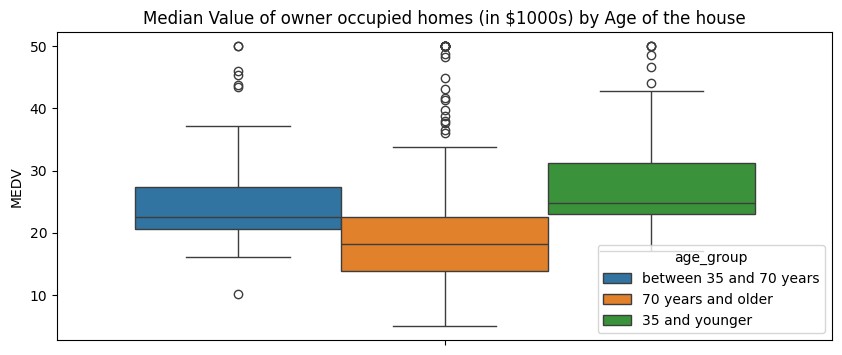

In [10]:
# create agegroup column to group house by age
boston_df.loc[boston_df['AGE']<=35,'age_group']='35 and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'age_group']='between 35 and 70 years'
boston_df.loc[boston_df['AGE']>=70,'age_group']='70 years and older' 

# box plot of MEDV and age group
pyplot.figure(figsize=(10,4))
sns.boxplot(y='MEDV', hue='age_group',data=boston_df
           )
pyplot.title('Median Value of owner occupied homes (in $1000s) by Age of the house');

- From the scatter plot below we can see that there is an upward slope relation (i.e) as Nitric oxide concentrations increases ,the proportion of non-retail business acres per town also increases to some extent.
- We can perform a pearsonr correlation to check the strength of the relationship and if it is statistically significant.

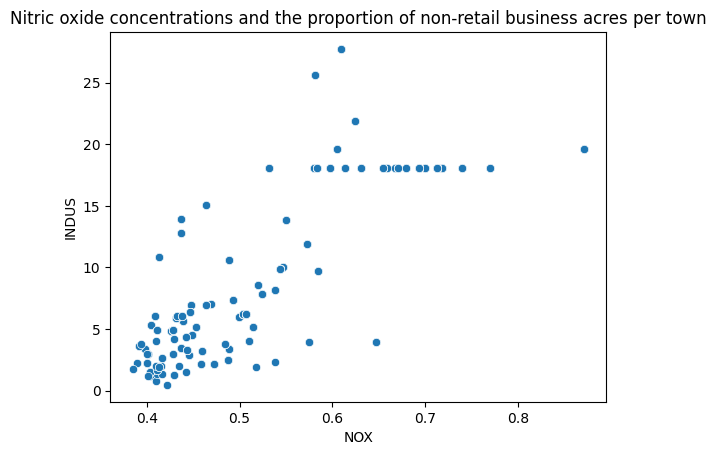

In [11]:
sns.scatterplot(x='NOX',y='INDUS',data=boston_df)
pyplot.title('Nitric oxide concentrations and the proportion of non-retail business acres per town');

- From the histogram below we can see that the mean is around 18 and the distribution is slightly skewed to the left

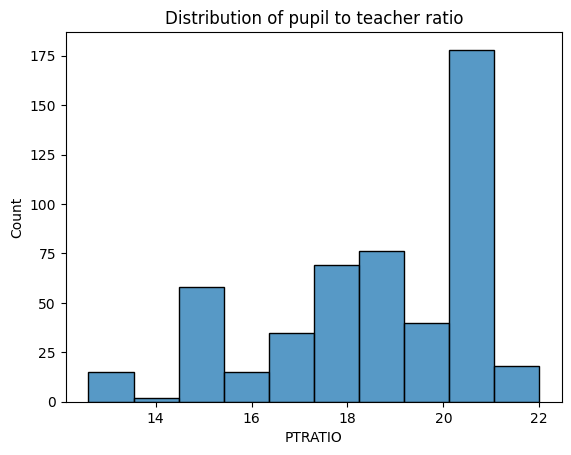

In [12]:
sns.histplot(boston_df.PTRATIO,bins=10)
pyplot.title('Distribution of pupil to teacher ratio');

<font color='Orange'><h3>Task 3</h3></font>

<h4> 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

<font color='blue'>
    
<b>Hypothesis</b>
*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river or not")

α = 0.05

In [16]:
# Perform Levines test to check if variance is equal or not

scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

<font color='blue'> Since the pvalue = 0.003 which is less than 0.05, we reject null hypothesis of equal variance and assume they have unequal variance </font>

In [17]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

<font color='blue'> Since the pvalue = 0.003 which is less than 0.05, we reject null hypothesis.

<font color='blue'> <b> Thus there is a difference in median value of houses depending on whether they are bound by Charles river or not </b>

<h4>2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [20]:
# we will create three groups of the age variable using function below

def age_group(x):
    if x<=40:
        y='<=40'
    elif (x>40) & (x<=80):
        y='>40 and <=80'
    else:
        y='>80'
    return (y)

boston_df['Age grp']=boston_df['AGE'].apply(age_group)

In [29]:
boston_df.groupby(['Age grp']).agg({'MEDV' : ['count','mean',np.std]})

MEDV                     
             count       mean       std
Age grp                                
<=40           109  27.431193  7.618444
>40 and <=80   157  24.310191  7.488274
>80            240  19.145417  9.558259

<font color='blue'>
    
<b>Hypothesis</b>

H0: Mean values of MEDV does not differ with AGE

H1: Atleast one of the means is different

α = 0.05

In [31]:
# create teh three groups to pass to ANOVA
fourtylower= boston_df[boston_df['Age grp']=='<=40']['MEDV']
fourtyeighty=boston_df[boston_df['Age grp']=='>40 and <=80']['MEDV']
eightyhigher=boston_df[boston_df['Age grp']=='>80']['MEDV']

In [34]:
fstat,p = scipy.stats.f_oneway(fourtylower,fourtyeighty,eightyhigher)
print(fstat,p)

40.02862343056458 7.37873724636121e-17


<font color='blue'> Since the pvalue = 7.37e-17 which is less than 0.05, we reject null hypothesis.

<font color='blue'> <b> Thus there is a difference in median value of houses for each proportion of owner occupied units built prior to 1940 </b>

<h4> 3.Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

<font color='blue'>
    
<b>Hypothesis</b>

H0: Nitric Oxide concentration and proportion of non retail business acres is NOT correlated

H1: Nitric Oxide concentration and proportion of non retail business acres is correlated

α = 0.05

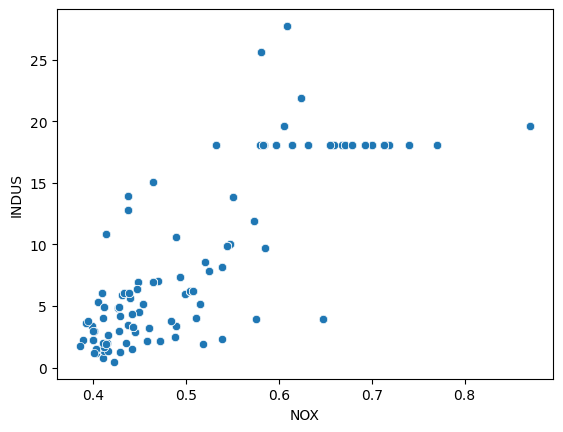

In [41]:
ax=sns.scatterplot(x="NOX",y="INDUS",data=boston_df)

In [42]:
scipy.stats.pearsonr(boston_df.NOX,boston_df.INDUS)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

<font color='blue'> Since the correlation coefficient is 0.76, there is a strong positive correlation between NOX and INDUS, the p value is less than 0.05, hence we reject null hypothesis.

<font color='blue'> <b> Thus Nitric Oxide concentration and proportion of non retail business acres is <i>correlated</b>

<h4>4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

<font color='blue'>
    
<b>Hypothesis</b>

H0: weighted distance to the five Boston employment centres and the median value of owner occupied homes have no association/relation

H1: weighted distance to the five Boston employment centres and the median value of owner occupied homes have an association/relation

α = 0.05

In [44]:
# input/ independent variable
X= boston_df['DIS']
# target/ dependent variable
y= boston_df['MEDV']

X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
predictions=model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        14:59:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> <font color='blue'> R-square is 0.062, R will be √0.062, correlation coefficient is 0.24. There is a  weak to moderate correlation between weighted distance  to the five Boston employment centres on the median value of owner occupied homes.
p value is less than 0.05, so we reject null hypothesis that there is no relation.

<b> <font color='blue'> And conclude that the weighted distance to 5 boston employment centres has a relation to median value of owner occupied homes